In [8]:
import pandas as pd  

df=pd.read_csv('medquad.csv')


In [9]:
df.shape

(16412, 4)

In [6]:
print(df.columns)

Index(['question', 'answer', 'source', 'focus_area'], dtype='object')


In [7]:
print(df.isnull().sum())

question       0
answer         5
source         0
focus_area    14
dtype: int64


In [9]:
df.describe()

,question,answer,source,focus_area
count,16412,16407,16412,16398
unique,14984,15817,9,5126
top,What causes Causes of Diabetes ?,This condition is inherited in an autosomal re...,GHR,Breast Cancer
freq,20,348,5430,53


In [11]:
df_missing_answer = df[df["answer"].isnull()]
print(df_missing_answer)


                                               question answer source  \
3591                     What is (are) HELLP syndrome ?    NaN   GARD   
3840  What is (are) X-linked lymphoproliferative syn...    NaN   GARD   
4200            What is (are) Familial HDL deficiency ?    NaN   GARD   
4433  What is (are) Emery-Dreifuss muscular dystroph...    NaN   GARD   
6693  What is (are) Emery-Dreifuss muscular dystroph...    NaN   GARD   

                                            focus_area  
3591                                    HELLP syndrome  
3840             X-linked lymphoproliferative syndrome  
4200                           Familial HDL deficiency  
4433       Emery-Dreifuss muscular dystrophy, X-linked  
6693  Emery-Dreifuss muscular dystrophy, dominant type  


In [17]:
print(df.loc[3591, "question"])
print(df.loc[3840, "question"])   
print(df.loc[4200, "question"])
print(df.loc[4433, "question"])  
print(df.loc[6693, "question"])

What is (are) HELLP syndrome ?
What is (are) X-linked lymphoproliferative syndrome ?
What is (are) Familial HDL deficiency ?
What is (are) Emery-Dreifuss muscular dystrophy, X-linked ?
What is (are) Emery-Dreifuss muscular dystrophy, dominant type ?


In [ ]:
import pandas as pd


# Dictionary with the missing answers
answers_dict = {
    3591: "HELLP syndrome (Hemolysis, Elevated Liver enzymes, Low Platelets) is a severe complication of preeclampsia, characterized by hemolysis, liver enzyme elevation, and low platelet count.",
    3840: "X-linked lymphoproliferative syndrome is a rare immune disorder caused by mutations in the SH2D1A gene, leading to uncontrolled Epstein-Barr virus infections, immune dysfunction, and risk of lymphoma.",
    4200: "Familial HDL deficiency is a genetic disorder where high-density lipoprotein (HDL) cholesterol is abnormally low, increasing the risk of premature cardiovascular disease.",
    4433: "Emery-Dreifuss muscular dystrophy (EDMD) is a genetic disorder affecting skeletal and cardiac muscles, causing progressive weakness, contractures, and heart complications. The X-linked form is due to mutations in the EMD gene.",
    6693: "The dominant type of Emery-Dreifuss muscular dystrophy is caused by mutations in the LMNA gene (lamin A/C) and follows an autosomal dominant inheritance pattern."
}

# Update the DataFrame with missing answers
for index, answer in answers_dict.items():
    df.at[index, "answer"] = answer

# Save the updated dataset
df.to_csv("dataset.csv", index=False)


                                               question  \
3591                     What is (are) HELLP syndrome ?   
3840  What is (are) X-linked lymphoproliferative syn...   
4200            What is (are) Familial HDL deficiency ?   
4433  What is (are) Emery-Dreifuss muscular dystroph...   
6693  What is (are) Emery-Dreifuss muscular dystroph...   

                                                 answer  
3591  HELLP syndrome (Hemolysis, Elevated Liver enzy...  
3840  X-linked lymphoproliferative syndrome is a rar...  
4200  Familial HDL deficiency is a genetic disorder ...  
4433  Emery-Dreifuss muscular dystrophy (EDMD) is a ...  
6693  The dominant type of Emery-Dreifuss muscular d...  


In [12]:
df_missing_focus = df[df["focus_area"].isnull()]
print(df_missing_focus)


                                               question  \
7885                                   What is (are)  ?   
7886          what is vancomycin-resistant enterococci?   
7887  what types of infections does vancomycin-resis...   
7888  are certain people at risk of getting vancomyc...   
7889  what is the treatment for vancomycin-resistant...   
7890  how can patients prevent the spread of vancomy...   
8077                                   What is (are)  ?   
8078                     what is staphylococcus aureus?   
8079  how can the spread of visa and vrsa be prevented?   
8080        what is cdc doing to address visa and vrsa?   
8081                       how vaccines prevent disease   
8082                             Who is at risk for ? ?   
8083                                  How to prevent  ?   
8084              what diseases are vaccine preventable   

                                                 answer source focus_area  
7885  On this Page General Information

In [21]:

# Remplacer les valeurs manquantes dans 'focus_area' par "Pas disponible"
df["focus_area"].fillna("Not available", inplace=True)

df.to_csv("dataset.csv", index=False)


In [20]:

print(df.isnull().sum())

question      0
answer        0
source        0
focus_area    0
dtype: int64


In [3]:
import pandas as pd

# Charger le fichier avec un encodage tolérant (latin1)
df = pd.read_csv("C:/Users/Aycha/Desktop/dataset.csv", encoding="latin1", on_bad_lines='skip')

# Remplacer les caractères invalides
df = df.applymap(lambda x: x.encode('utf-8', 'ignore').decode('utf-8') if isinstance(x, str) else x)

# Sauvegarder en UTF-8 propre
df.to_csv("C:/Users/Aycha/Desktop/dataset_utf8.csv", encoding="utf-8", index=False)

print("✅ Fichier nettoyé et converti en UTF-8 avec succès !")


C:\Users\Aycha\AppData\Local\Temp\ipykernel_3996\1643761939.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode('utf-8', 'ignore').decode('utf-8') if isinstance(x, str) else x)


✅ Fichier nettoyé et converti en UTF-8 avec succès !


In [5]:
file_path = "C:/Users/Aycha/Desktop/dataset_utf8.csv"

# Lire le fichier ligne par ligne et identifier la ligne problématique
with open(file_path, "rb") as f:
    for i, line in enumerate(f, start=1):
        try:
            line.decode("utf-8")  # Essayer de décoder en UTF-8
        except UnicodeDecodeError as e:
            print(f"🚨 Erreur d'encodage à la ligne {i}: {e}")
            print(f"🔍 Contenu problématique: {line}")
            break  # On arrête dès qu'on trouve la ligne fautive


### Data of metrics

In [6]:
metrics = pd.read_csv("metrics_log.csv")
metrics

,query,best_match,response,cosine_similarity,rouge1,rouge2,rougeL,response_time
0,How many people are affected by malignant migr...,MMPSI is a rare condition. Although its preval...,Malignant migrating partial seizures of infanc...,0.7994,0.3077,0.1573,0.2637,6.2254
1,Is Galloway-Mowat syndrome inherited ?,How is Galloway-Mowat syndrome inherited? Gall...,"Yes, Galloway-Mowat syndrome is inherited in a...",0.9144,0.4070,0.2235,0.2907,3.2484
2,What are the treatments for Weill-Marchesani s...,These resources address the diagnosis or manag...,Weill-Marchesani syndrome (WMS) treatment focu...,0.8288,0.1253,0.0373,0.0603,12.2914
3,What are the treatments for Schimke immunoosse...,How might Schimke immunoosseous dysplasia be t...,Treatment for Schimke immuno-osseous dysplasia...,0.7506,0.3204,0.1403,0.2532,10.0754
4,What are the symptoms of Coronary Microvascula...,The signs and symptoms of coronary microvascul...,Coronary microvascular disease (MVD) presents ...,0.8215,0.5225,0.2022,0.3169,9.1486
...,...,...,...,...,...,...,...,...
122,what's the symptomes of diabete ?,Many people with diabetes experience one or mo...,The symptoms of diabetes can vary depending on...,0.7646,0.2606,0.0721,0.1107,628.2839
123,what's the symptomes of diabete ?,Many people with diabetes experience one or mo...,The symptoms of diabetes can vary depending on...,0.7607,0.2692,0.0645,0.1154,587.4624
124,what's the symptomes of diabete ?,Many people with diabetes experience one or mo...,The symptoms of diabetes can vary depending on...,0.7506,0.2432,0.0612,0.1033,313.2881
125,what's the symptomes of diabete ?,Many people with diabetes experience one or mo...,The symptoms of diabetes can vary depending on...,0.7567,0.2667,0.0738,0.1067,13.0399


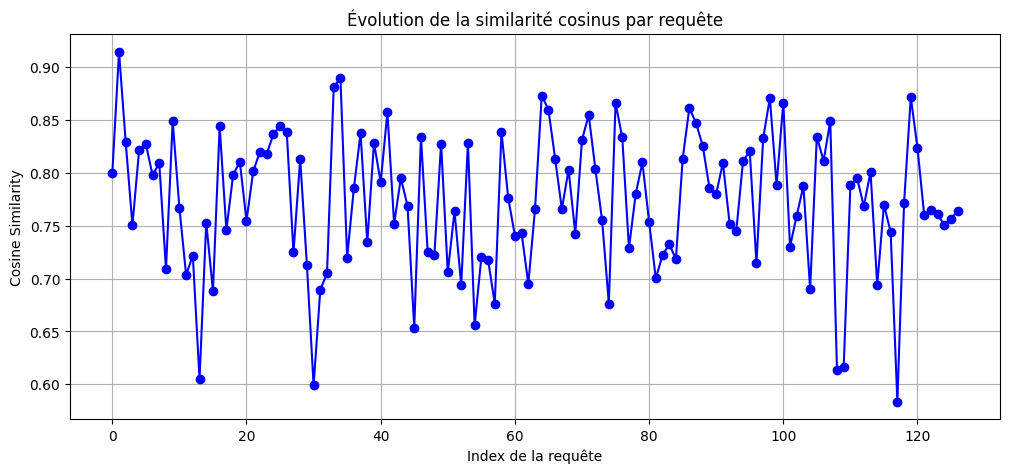

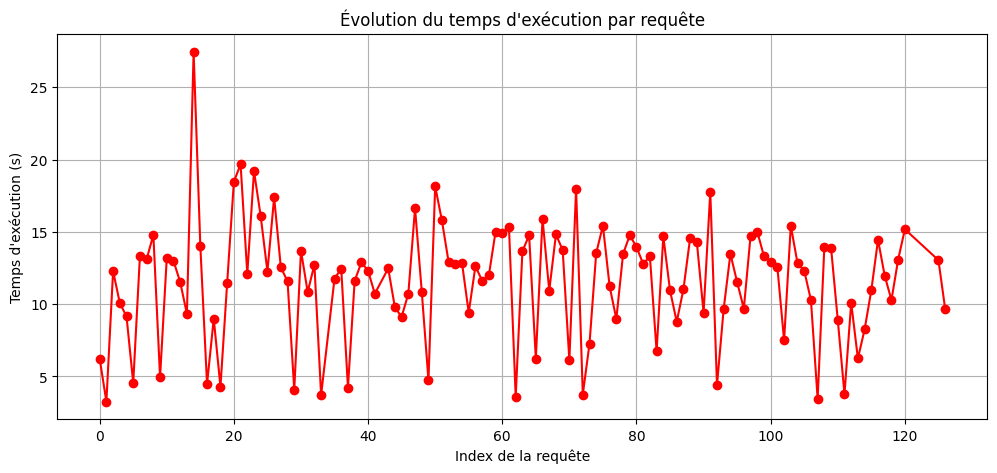

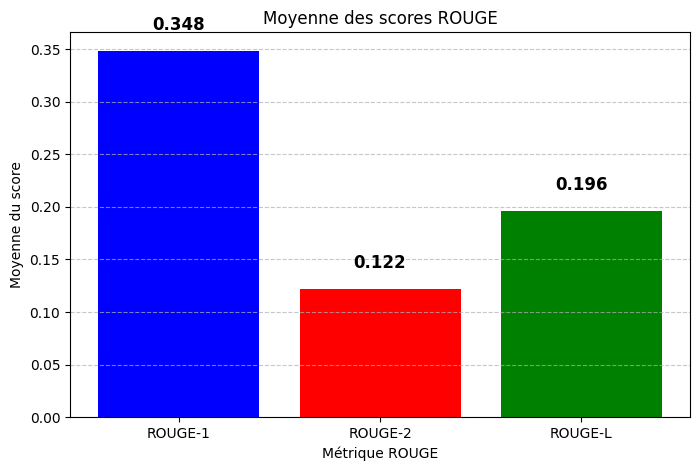

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("metrics_log.csv")

# Assurer que les données sont triées par index ou par requête si nécessaire
df.reset_index(inplace=True)

# 1. Évolution de la similarité cosinus par requête
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["cosine_similarity"], marker="o", linestyle="-", color="blue")
plt.xlabel("Index de la requête")
plt.ylabel("Cosine Similarity")
plt.title("Évolution de la similarité cosinus par requête")
plt.grid(True)
plt.show()

# 2. Évolution du temps d’exécution par requête (enlevant valeurs > 300s)
df_filtered = df[df["response_time"] <= 300]

plt.figure(figsize=(12, 5))
plt.plot(df_filtered.index, df_filtered["response_time"], marker="o", linestyle="-", color="red")
plt.xlabel("Index de la requête")
plt.ylabel("Temps d'exécution (s)")
plt.title("Évolution du temps d'exécution par requête")
plt.grid(True)
plt.show()

rouge_means = {
    "ROUGE-1": df["rouge1"].mean(),
    "ROUGE-2": df["rouge2"].mean(),
    "ROUGE-L": df["rougeL"].mean(),
}

# Création de l'histogramme des moyennes des scores ROUGE
plt.figure(figsize=(8, 5))
plt.bar(rouge_means.keys(), rouge_means.values(), color=["blue", "red", "green"])
plt.xlabel("Métrique ROUGE")
plt.ylabel("Moyenne du score")
plt.title("Moyenne des scores ROUGE") # Les scores ROUGE sont généralement entre 0 et 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher les valeurs sur les barres
for i, value in enumerate(rouge_means.values()):
    plt.text(i, value + 0.02, f"{value:.3f}", ha="center", fontsize=12, fontweight="bold")

plt.show()






# Creation of a dataset

In [8]:
import pandas as pd

# Lire le fichier texte et stocker chaque ligne dans une liste
file_path = r"C:\\Users\\Aycha\\Downloads\\archive\\drugs.txt"

with open(file_path, "r") as file:
    lines = [line.strip() for line in file.readlines()]  # Utilisation de strip() pour enlever \n


# Créer un DataFrame à partir des lignes lues
data = pd.DataFrame(lines, columns=["Drug"])



In [10]:
data.head()

,Drug
0,Abacavir
1,"Abacavir, dolutegravir, and lamivudine"
2,Abacavir and lamivudine
3,Abacavir and Lamivudine Tablets
4,"Abacavir, lamivudine, and zidovudine"


In [28]:
from config import API_KEY
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate
import json

# Initialize Gemini
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro", temperature=0.5, google_api_key=API_KEY)


In [39]:
import json
import re

def generate_medication_info(medication_name: str) -> dict:
    """Generate structured information about a medication including indications, side effects, interactions, etc."""

    prompt_template = ChatPromptTemplate.from_template("""
    You are a medical AI assistant with expertise in pharmacology.
    Your goal is to provide accurate, structured, and comprehensive information about medications.

    **Instructions:**
    - For the given medication, provide the following details in JSON format:
        1. **Indications**: The medical conditions or diseases for which the medication is prescribed.
        2. **Side Effects**: Possible adverse effects of the medication.
        3. **Drug Interactions**: Potential drug-drug or drug-food interactions.
        4. **Dosage**: The recommended dosage (if available).
    
    **Medication Name:** {medication_name}

    Return the information in this format:
    ```
    {{
        "Indications": "Indications for {medication_name}",
        "Side Effects": "Side effects for {medication_name}",
        "Drug Interactions": "Drug interactions for {medication_name}",
        "Dosage": "Dosage for {medication_name}"
    ```
    """)

    chain = prompt_template | llm
    response = chain.invoke({
        "medication_name": medication_name
    })

    # Extraction du JSON brut
    try:
        # Extraire le JSON de la réponse en supprimant la partie non-JSON (balises ```json)
        json_string = re.search(r'```json\n({.*})\n```', response.content, re.DOTALL)
        if json_string:
            json_data = json_string.group(1)  # Le contenu JSON brut
            info = json.loads(json_data)  # Décodage du JSON
        else:
            raise ValueError("Aucun JSON valide trouvé dans la réponse.")
    
    except (json.JSONDecodeError, ValueError) as e:
        print(f"Error decoding JSON for medication: {medication_name}. Error: {e}")
        info = {
            "Indications": "N/A",
            "Side Effects": "N/A",
            "Drug Interactions": "N/A",
            "Dosage": "N/A"
        }
    
    return info


In [ ]:
import pandas as pd

def populate_medication_info(df, csv_file="medication_info.csv"):
    # Ajouter les colonnes pour les informations si elles n'existent pas déjà
    df['Indications'] = None
    df['Side Effects'] = None
    df['Drug Interactions'] = None
    df['Dosage'] = None

    # Traiter chaque ligne du DataFrame
    for index, row in df.iterrows():
        medication_name = row['Drug']
        info = generate_medication_info(medication_name)

        # Ajouter les informations dans le DataFrame
        df.at[index, 'Indications'] = info.get('Indications', 'N/A')
        df.at[index, 'Side Effects'] = info.get('Side Effects', 'N/A')
        df.at[index, 'Drug Interactions'] = info.get('Drug Interactions', 'N/A')
        df.at[index, 'Dosage'] = info.get('Dosage', 'N/A')

        # Sauvegarder le DataFrame dans un CSV après chaque itération
        df.to_csv(csv_file, index=False)

    return df


df_with_info = populate_medication_info(df)
print(df_with_info.head())


Error decoding JSON for medication: Abatacept. Error: Expecting ',' delimiter: line 30 column 32 (char 1518)
Error decoding JSON for medication: ABRILADA. Error: Aucun JSON valide trouvé dans la réponse.
Error decoding JSON for medication: Acetadote. Error: Expecting ':' delimiter: line 39 column 5 (char 1457)
Error decoding JSON for medication: Adacel Tdap. Error: Expecting value: line 23 column 3 (char 899)
Error decoding JSON for medication: Adalimumab. Error: Expecting ',' delimiter: line 67 column 5 (char 2117)
Error decoding JSON for medication: Afrin 12 Hour. Error: Aucun JSON valide trouvé dans la réponse.
Error decoding JSON for medication: Afrin NoDrip Original. Error: Aucun JSON valide trouvé dans la réponse.
Error decoding JSON for medication: AK-Pentolate Ophthalmic. Error: Expecting ',' delimiter: line 8 column 13 (char 325)
Error decoding JSON for medication: Alirocumab. Error: Aucun JSON valide trouvé dans la réponse.
Error decoding JSON for medication: Alka-Seltzer Ant